# Strength of Concrete using ANN

In [21]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras 
from keras import Sequential
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [22]:
#Load the dataset
df=pd.read_csv("concrete_strength_prediction_dataset.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
#EDA (Shape and Size)
print("Shape of the dataset is",df.shape)
print("Size of the dataset is",df.size)

Shape of the dataset is (1030, 9)
Size of the dataset is 9270


In [24]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
#EDA (Describe)
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [26]:
#EDA (Skweness)
df.skew()

cement                           0.509481
blast_furnace_slag               0.800717
fly_ash                          0.537354
water                            0.074628
superplasticizer                 0.907203
coarse_aggregate                -0.040220
fine_aggregate                  -0.253010
age                              3.269177
concrete_compressive_strength    0.416977
dtype: float64

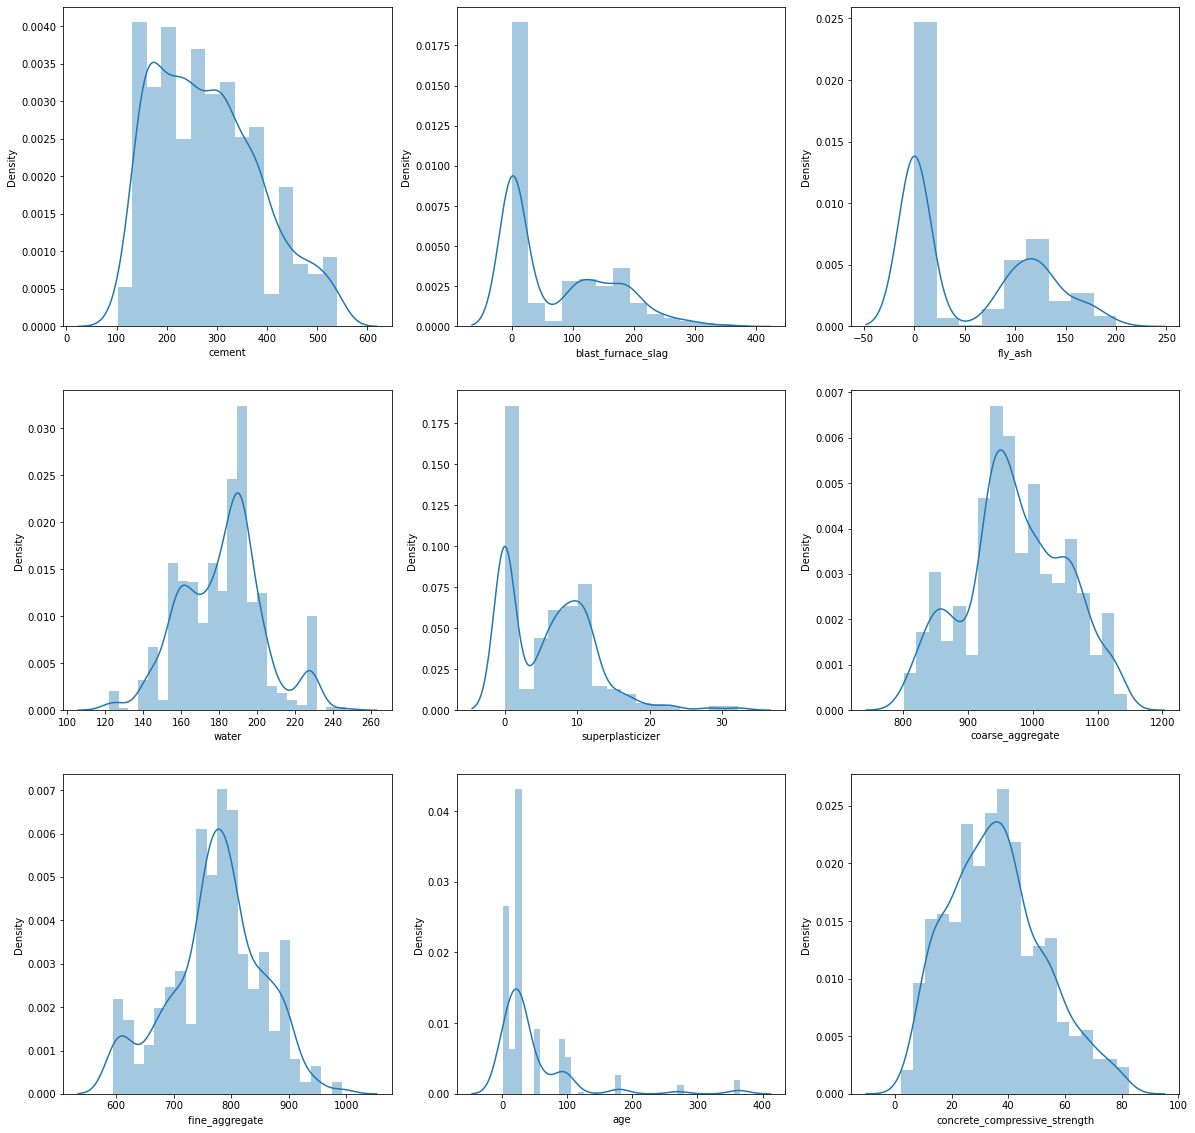

In [27]:
#Data visulization 
df_cols=df.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[20,20])
for col,sub in zip(df_cols,ax.flatten()):
    sns.distplot(df[col],ax=sub)

In [28]:
#Missing values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

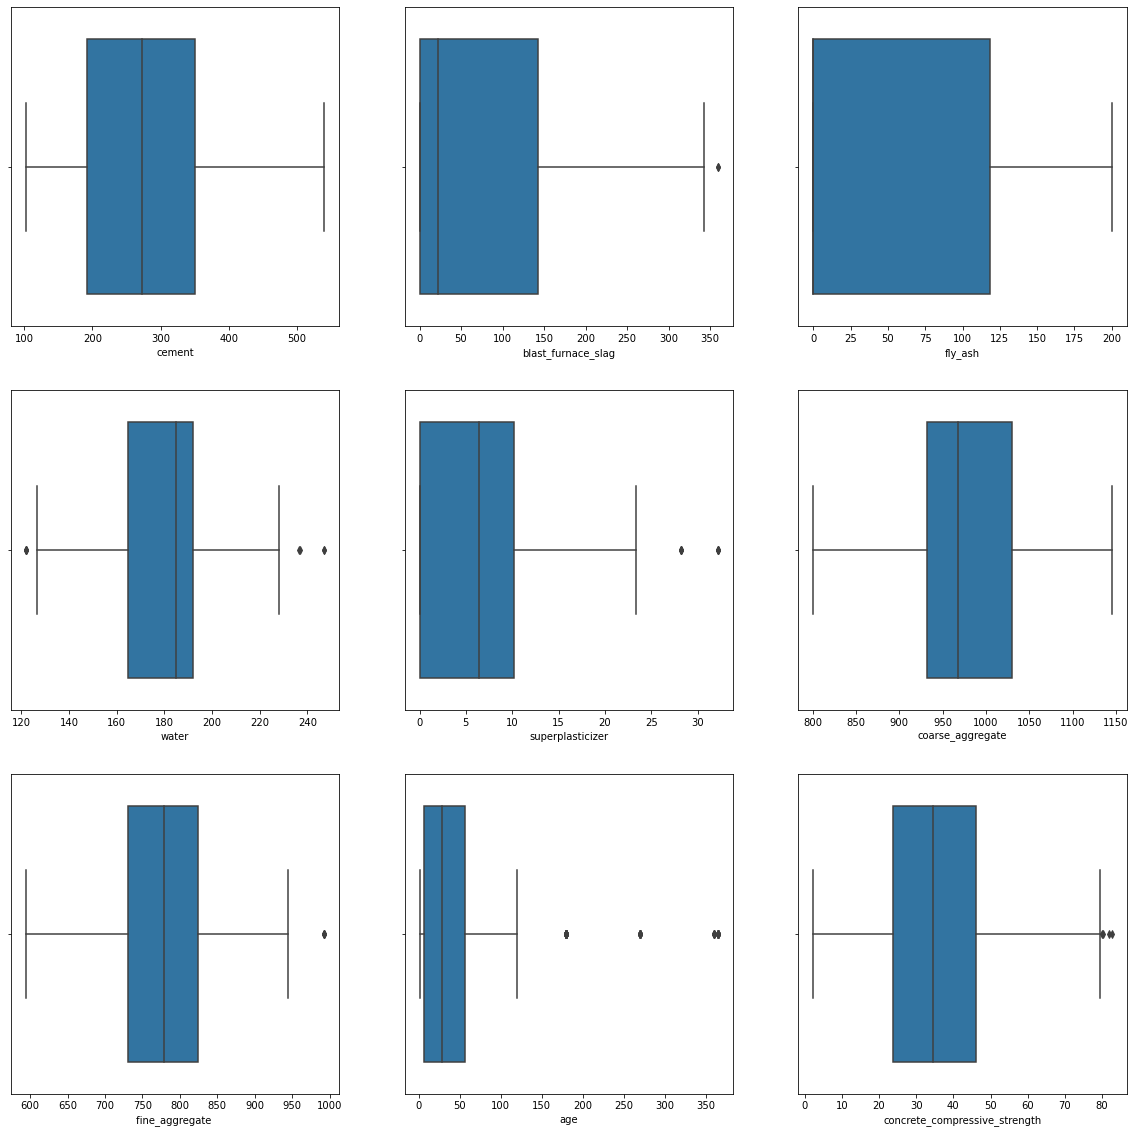

In [29]:
#Outliers
df_cols=df.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[20,20])
for col,sub in zip(df_cols,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [30]:
#Treatment of outliers
df_ot=df[["age","blast_furnace_slag","water","superplasticizer"]]
for col in df_ot.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    mn=q1-(1.5*iqr)
    mx=q3+(1.5*iqr)
    df[col]=np.where(df[col]>mx,mx,df[col])

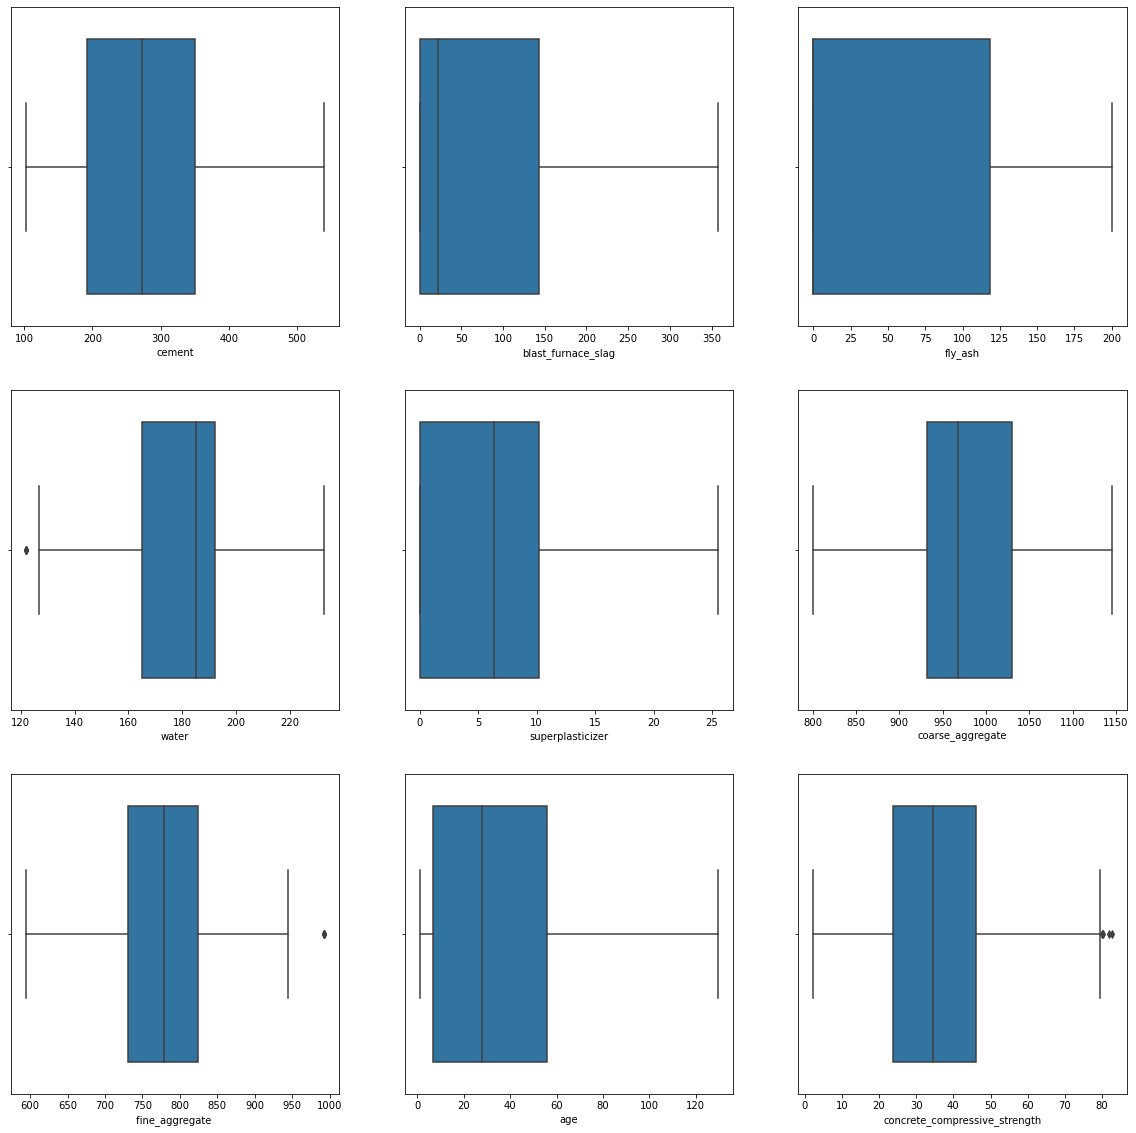

In [31]:
#Outliers
df_cols=df.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[20,20])
for col,sub in zip(df_cols,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [32]:
#Data stansardization
SS=StandardScaler()
X=df.drop("concrete_compressive_strength",axis=1)
y=df[["concrete_compressive_strength"]]
ScaledX=SS.fit_transform(X)

In [33]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(ScaledX,y,train_size=0.8)

In [34]:
#Model Creation 
#Model instantiate
Model=Sequential()
#Adding an input layer
Model.add(keras.layers.Dense(input_dim=8,units=150,activation="linear"))
#Adding a hidden layer
Model.add(keras.layers.Dense(units=50,activation="linear"))
#Adding an outlut layer
Model.add(keras.layers.Dense(units=1,activation="linear"))
#Compilation
Model.compile(optimizer="adam",loss="msle",metrics="mse")
#Summary
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1350      
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Fitting the Model
hist=Model.fit(X_train,y_train,epochs=100)

Epoch 1/100
26/26 [==============================] - 3s 3ms/step - loss: 9.2358 - mse: 1549.1565
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 7.3442 - mse: 1545.1592
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 5.8262 - mse: 1523.5614
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 4.5564 - mse: 1433.1569
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 3.5794 - mse: 1238.5201
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 2.3991 - mse: 925.1868
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6400 - mse: 538.1452
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2743 - mse: 342.9211
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1839 - mse: 249.6504
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1384 - mse: 191.8528
Epoch 11/100
26/26 [==============

In [36]:
#Performance Paraters
predict=Model.predict(X_test)
print("r2 value",metrics.r2_score(y_test,predict))

7/7 [==============================] - 0s 4ms/step
r2 value 0.6887007034503199


Text(0, 0.5, 'mse and loss')

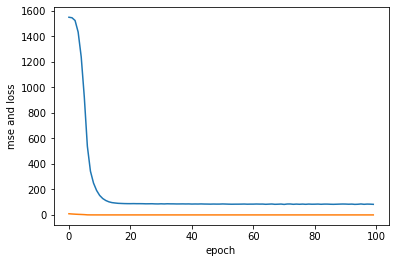

In [37]:
#Plot
plt.plot(hist.history["mse"])
plt.plot(hist.history["loss"])
plt.xlabel("epoch")
plt.ylabel("mse and loss")

# The image above shows that as the epochs increase the loss decreases, which is a good sign of progress.